В этом минипроекте вам предстоит проанализировать данные из Google Play Store. Чуть ниже вы можете ознакомиться с описанием данных. Мы разбили задачи на степы, чтобы было проще их проверить. В некоторых из задач также можно встретить небольшие подсказки. Успехов :)

Описание данных

App — название приложения

Category — категория, к которой относится приложение

Rating — рейтинг пользователей

Reviews — количество отзывов пользователей о приложении

Size — размер приложения

Installs — количество загрузок/установок приложения пользователями

Type — платное или бесплатное приложение

Price — цена приложения

Content Rating — возрастная группа, на которую ориентировано приложение

Genres — принадлежность приложения к нескольким жанрам

Last Updated — дата последнего обновления приложения в Play Store

Current Ver — текущая версия приложения в Play Store

Android Ver — минимальная требуемая версия Android

***Адаптировано под другие данные***

Сохраните в переменные data_head и data_tail первые и последние 3 строки из датафрейма соответственно. 

In [6]:
import pandas as pd
data = pd.read_csv('5 train.csv')
data_head = data.head(3)
data_tail = data.tail(3)
data_tail

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


Сохраните в переменные n_col и n_row количество столбцов и строк в датафрейме соответственно. 

In [11]:
n_rows, n_cols = data.shape
n_rows, n_cols, data.shape

(10886, 12, (10886, 12))

Давайте теперь посмотрим, какое количество уникальных приложений есть в наших данных (колонка App).

*посмотрим, сколько есть сезонов (должно быть 4) и сколько есть записей для каждого*

In [16]:
import numpy as np
n_seasons = pd.unique(data['season'])
_, season_counts = np.unique(data['season'], return_counts = True)
n_seasons, season_counts

(array([1, 2, 3, 4], dtype=int64),
 array([2686, 2733, 2733, 2734], dtype=int64))

Давайте посчитаем число пропущенных значений в колонке с рейтингом приложений. 
Сохраните в переменную rating_missing количество пропущенных значений в колонке Rating. 

*посмотрим для столбца weather*

In [32]:
assert not data.isnull().any().any() #в этом датасете нет пропущенных
weather_missing = data['weather'].isnull().sum()

Научимся объединять датафреймы и познакомимся с функцией concat.

Допустим, мы хотим собрать датафрейм, который будет включать в себя: первые три строки исходного датафрейма, строки 6-8 (включительно), строки 16-19 (включительно) и колонки: App, Size, Genres, Current Ver в соответствующем порядке.

По сути, это будет выглядеть как объединение трех, состоящих из нескольких строк, датафреймов, являющимися срезами из исходных данных.

В качестве ответа загрузите полученный датафрейм в формате csv. При сохранении финального датафрейма, колонка с индексами должна остаться.


In [36]:
data_combined = pd.concat([
    data[['datetime', 'weather', 'count']].head(3),
    data[['datetime', 'weather', 'count']][6:9],
    data[['datetime', 'weather', 'count']][16:20]
    ],
    axis = 0

)
data_combined.to_csv('data_combined')
pd.read_csv('data_combined', index_col = 0)

,datetime,weather,count
0,2011-01-01 00:00:00,1,16
1,2011-01-01 01:00:00,1,40
2,2011-01-01 02:00:00,1,32
6,2011-01-01 06:00:00,1,2
7,2011-01-01 07:00:00,1,3
8,2011-01-01 08:00:00,1,8
16,2011-01-01 16:00:00,2,93
17,2011-01-01 17:00:00,2,67
18,2011-01-01 18:00:00,3,35
19,2011-01-01 19:00:00,3,37


Для дальнейшего анализа нам необходимо убрать дубликаты приложений (колонка App) и сбросить индекс. Сохраните полученный результат в виде датафрейма в переменную unique_playstore.

*уберем дубликаты count (чушь но что поделать)*

In [53]:
data_unique = data.drop_duplicates('count', keep = 'first')
data_unique.reset_index()                                   #или ignore_index=True сразу

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,10486,2012-12-03 08:00:00,4,0,1,1,14.76,18.940,93,0.0000,19,712,731
818,10495,2012-12-03 17:00:00,4,0,1,1,21.32,25.000,63,7.0015,43,665,708
819,10544,2012-12-05 18:00:00,4,0,1,1,17.22,21.210,35,30.0026,29,580,609
820,10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688


В этом задании названия колонок необходимо привести к стандартному виду — все буквы должны быть нижнего регистра, а пробелы должны быть заменены на нижние подчеркивания. 

In [134]:
data.rename(columns = {'workingday' : 'working day', 'windspeed' : 'wind speed'}, inplace=True) #чтобы были пробелы, которые далее будем менять

new_columns = []
for column in data.columns:
    column = column.lower().replace(' ', '_')
    new_columns.append(column)
    
data.columns = new_columns
data

,datetime,season,holiday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,110101,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,110101,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,110101,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,110101,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,110101,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,121219,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,121219,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,121219,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,121219,22


Давайте посмотрим на долю платных и бесплатных приложений. В качестве ответа введите долю бесплатных приложений. Ответ округлите до сотых, в качестве десятичного разделителя используйте точку. 

*в задании переменная type бинарна, поэтому посмотрим на 'working_day' - такую же бинарную переменную*

In [63]:
_, working_day_counts = np.unique(data['working_day'], return_counts=True)
working_day_rate = round(working_day_counts[1] / data.shape[0], 2)              
working_day_rate

0.68

Отберите из датафрейма только те приложения, которые относятся к образовательной категории  (EDUCATION) и с количеством отзывов пользователей более 1000. Сохраните новый датафрейм в переменную education_playstore.

*отберем записи, сделанные весной и с count больше 100*

In [76]:
data_filtered = data.query('season == 1 and count > 100').reset_index(drop=True)
data_filtered

,datetime,season,holiday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count
0,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106
1,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110
2,2011-01-03 08:00:00,1,0,1,1,5.74,6.060,50,19.0012,1,153,154
3,2011-01-03 17:00:00,1,0,1,1,9.84,11.365,30,15.0013,11,146,157
4,2011-01-03 18:00:00,1,0,1,1,9.84,12.880,32,7.0015,9,148,157
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801
1096,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549
1097,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330
1098,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223


Давайте уберем лишние символы из колонки с ценой (price), чтобы далее с ней было удобнее работать, и переведем данные в тип float. 

*переведем datetime в инт*

In [174]:
# data['datetime'] = data['datetime'].astype(int) -- не так все просто, это оказывается строка, поэтому разделим ее на два столбца - дату и время, а их переведем в инты
data[['date', 'time']] = pd.DataFrame(data['datetime'].str.split().tolist(), columns = ['date', 'time'])
data['date'] = data['date'].apply(lambda s: int(s[2:4]) * 10000 + int(s[5:7]) * 100 + int(s[8:10]))  #какое-то кодирование
data['time'] = data['time'].apply(lambda s: int(s[0:2]))
data

,datetime,season,holiday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,110101,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,110101,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,110101,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,110101,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,110101,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,121219,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,121219,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,121219,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,121219,22


В качестве последнего задания вам предстоит сделать сводную таблицу по данным. Полученная на выходе таблица должна соответствовать представленному шаблону: 


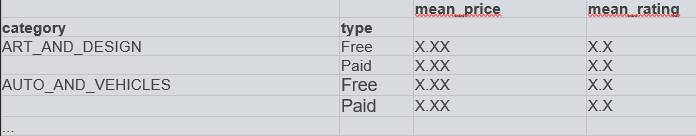

In [130]:
from IPython.display import Image
Image(filename = "table_example.png")

Колонки должны иметь соответствующие названия, значения таблицы округлены до указанного числа знаков после точки.

In [172]:
pivot = data.pivot_table(values=['humidity', 'wind_speed', 'count'], index=['weather','season'])
pivot.columns = ['mean_' + col for col in pivot.columns]

pivot.round({'mean_count' : 1,
             'mean_humidity' : 2,
             'mean_wind_speed' : 2})


mean_count  mean_humidity  mean_wind_speed
weather season                                            
1       1            126.8          50.12            15.74
        2            236.7          54.93            13.28
        3            243.6          60.59            11.24
        4            209.5          61.04            11.41
2       1            106.9          65.51            12.62
        2            189.5          69.50            12.97
        3            230.8          69.50            11.41
        4            194.8          71.63            11.68
3       1             61.2          76.47            12.37
        2            123.9          81.15            15.78
        3            156.6          82.09            14.40
        4            134.5          85.44            13.67
4       1            164.0          86.00             6.00